### **Logistic Regression Intuition**

In [1]:
import copy
import math
import numpy as np
import pandas as pd
from ipywidgets import Output
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

In [2]:
data = pd.read_csv('../assets/data.csv', header=0, names = ["x1","x2","y"])
data.head()

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
def mean_scale(x):
    col_avg = (x.mean(axis=0, keepdims=True)).flatten()
    col_denom = (x.max(axis=0, keepdims=True) - x.min(axis=0, keepdims=True)).flatten()

    for i in range(len(x)):
        x[i, 0] = (x[i, 0] - col_avg[0]) / col_denom[0]
        x[i, 1] = (x[i, 1] - col_avg[1]) / col_denom[1]

    return x

def min_max_scale(x):
    col_min = x.min(axis=0, keepdims=True).flatten()
    col_denom = (x.max(axis=0, keepdims=True) - x.min(axis=0, keepdims=True)).flatten()

    for i in range(len(x)):
        x[i, 0] = (x[i, 0] - col_min[0]) / col_denom[0]
        x[i, 1] = (x[i, 1] - col_min[1]) / col_denom[1]

    return x

In [4]:
X_train = np.array( [ [x1, x2] for x1, x2 in zip(data['x1'], data['x2']) ] ) #(m,n)
y_train = np.array([y for y in data['y']])
x_train = min_max_scale(X_train)

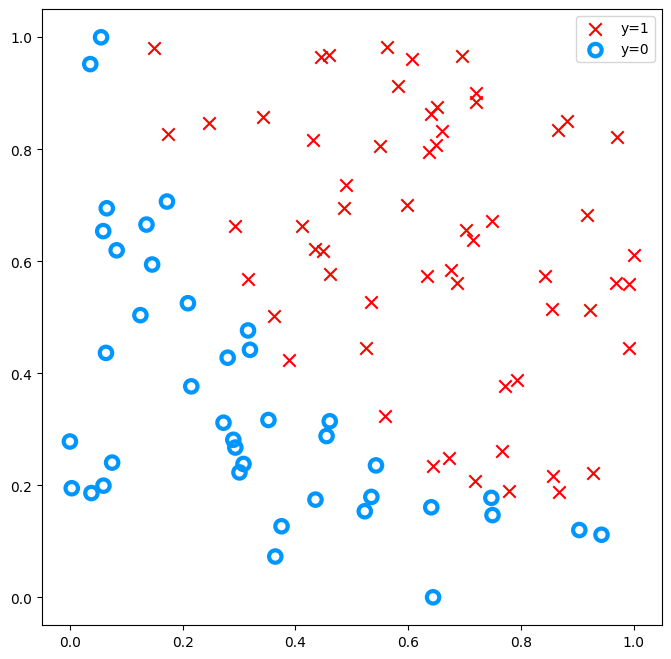

In [5]:
pos_label="y=1"
neg_label="y=0"
fig, ax = plt.subplots(1,1,figsize=(8,8))

pos = y_train == 1
neg = y_train == 0

# Plot examples
ax.scatter(X_train[pos, 0], X_train[pos, 1], marker='x', s=80, c = 'red', label=pos_label)
ax.scatter(X_train[neg, 0], X_train[neg, 1], marker='o', s=80, label=neg_label, facecolors='none', edgecolors='#0096ff', lw=3)
ax.legend(loc='best' )

ax.figure.canvas.header_visible = False
ax.figure.canvas.footer_visible = False
ax.figure.canvas.toolbar_visible = False

In [6]:
def sigmoid(z):
    # protects overflow
    z = np.clip(z, -500, 500)
    g = 1/(1 + np.exp(-z))

    return g

def compute_cost_logistic(X, y, w, b):
    cost = 0
    m = X.shape[0]

    for i in range(m):
        z_i = np.dot(X[i],w) + b
        fwb_i = sigmoid(z_i)
        cost +=  -y[i] * np.log(fwb_i) - (1-y[i]) * np.log(1-fwb_i)
             
    return cost / m

In [7]:
b_tmp = -3
w_tmp = np.array([1, 1])
print(compute_cost_logistic(X_train, y_train, w_tmp, b_tmp))

1.17359332246621


In [8]:
b_1 = -3
b_2 = -4
w_array1 = np.array([1, 1])
w_array2 = np.array([1, 1])

print("Cost for b = -3: ", compute_cost_logistic(X_train, y_train, w_array1, b_1))
print("Cost for b = -4: ", compute_cost_logistic(X_train, y_train, w_array2, b_2))

Cost for b = -3:  1.17359332246621
Cost for b = -4:  1.6884698491272594


### **Gradient Descent**

In [9]:
def compute_gradient_logistic(X, y, w, b): 
    m, n = X.shape
    
    dj_db = 0
    dj_dw = np.zeros((n,))

    for i in range(m):
        fwb_i = sigmoid(np.dot(X[i], w) + b)
        err_i = fwb_i - y[i]

        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]
        dj_db = dj_db + err_i
        
    return dj_db / m, dj_dw / m

In [10]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    b = b_in
    J_history = []
    w = copy.deepcopy(w_in)
    
    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)   

        w -= alpha * dj_dw               
        b -= alpha * dj_db               
      
        if i < 100000:
            J_history.append(compute_cost_logistic(X, y, w, b))

        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration at {i:4d}: Cost {J_history[-1]}")
        
    return w, b, J_history

In [11]:
b_tmp = 0
alph = 0.1
iters = 10000
w_tmp = np.zeros_like(X_train[0])

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters)

print(f"\nUpdated parameters: w:{w_out}, b:{b_out}")

Iteration at    0: Cost 0.6891063308247324
Iteration at 1000: Cost 0.37121531228885346
Iteration at 2000: Cost 0.30362706169470133
Iteration at 3000: Cost 0.27349804277227746
Iteration at 4000: Cost 0.2563041438151084
Iteration at 5000: Cost 0.24515572256378043
Iteration at 6000: Cost 0.23734569208758793
Iteration at 7000: Cost 0.23158389570294344
Iteration at 8000: Cost 0.22717311578524962
Iteration at 9000: Cost 0.22370172405872352

Updated parameters: w:[9.34700661 8.76650439], b:-8.185799512531103


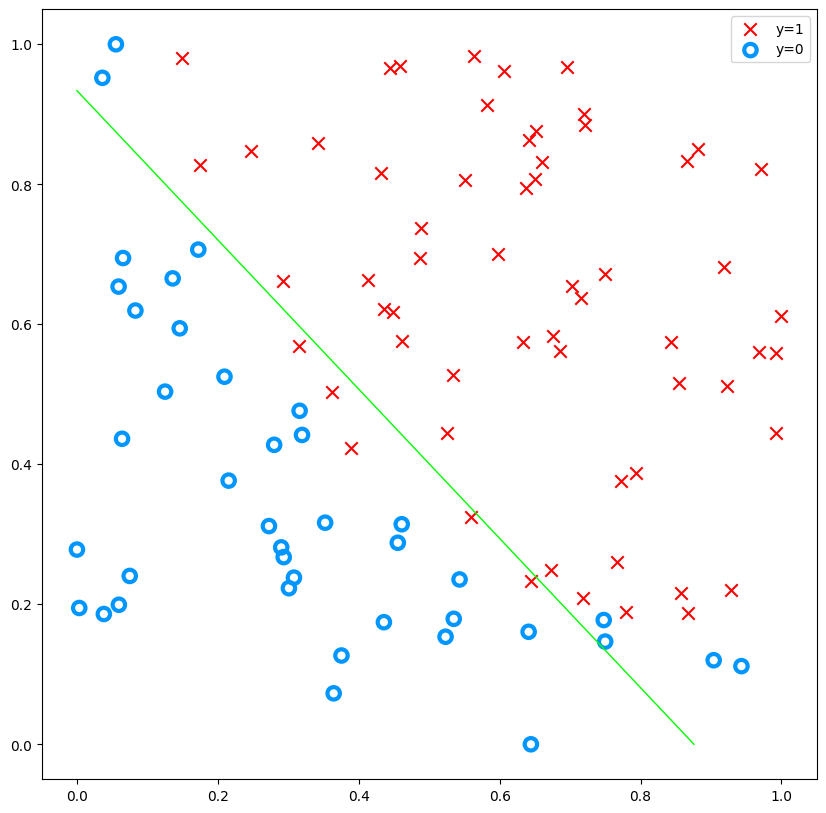

In [12]:
fig,ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot examples
ax.scatter(X_train[pos, 0], X_train[pos, 1], marker='x', s=80, c = 'red', label=pos_label)
ax.scatter(X_train[neg, 0], X_train[neg, 1], marker='o', s=80, label=neg_label, facecolors='none', edgecolors='#0096ff', lw=3)
ax.legend(loc='best')

ax.figure.canvas.header_visible = False
ax.figure.canvas.footer_visible = False
ax.figure.canvas.toolbar_visible = False

# Plot the decision boundary
x0 = -(b_out/w_out[0])
x1 = -(b_out/w_out[1])

ax.plot([0, x0],[x1, 0], c='#00ff00', lw=1)
plt.show()